In [2]:
! ls

HW8.ipynb  tmdb_5000_movies.csv


In [3]:
! pip3 install seaborn
! pip3 install plotly
! pip3 install ggplot
! pip3 install matplotlib

    100% |████████████████████████████████| 215kB 42kB/s ta 0:00:011
    100% |████████████████████████████████| 12.9MB 58kB/s eta 0:00:011
    100% |████████████████████████████████| 8.9MB 80kB/s eta 0:00:011
    100% |████████████████████████████████| 26.6MB 27kB/s eta 0:00:011
    100% |████████████████████████████████| 13.9MB 54kB/s eta 0:00:011
    100% |████████████████████████████████| 61kB 5.0MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 354kB/s ta 0:00:01
    100% |████████████████████████████████| 952kB 236kB/s ta 0:00:011
    100% |████████████████████████████████| 512kB 285kB/s ta 0:00:01
    100% |████████████████████████████████| 573kB 341kB/s ta 0:00:01
    100% |████████████████████████████████| 37.8MB 22kB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/f8/0e/2365ddc010afb3d79147f1dd544e5ee24bf4ece58ab99b16fbb465ce6dc0/pytz-2018.7-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 4.2MB/s eta 0:00:01
  Using

    100% |████████████████████████████████| 2.2MB 179kB/s ta 0:00:011
    100% |████████████████████████████████| 235kB 304kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/71/07/16d781df15be30df4acfd536c479268f1208b2dfbc91e9ca5d92c9caf673/matplotlib-3.0.2-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 7.4MB 69kB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ff/7f/9d804d2348471c67a7d8b5f84f9bc59fd1cefa148986f2b74552f8573555/numpy-1.15.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/e6/6d4edaceee6a110ecf6f318482f5229792f143e468b34a631f5a0899f56d/scipy-1.2.0-cp36-

In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

import warnings
warnings.simplefilter('ignore')


%pylab inline

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [33]:
df = pd.read_csv('tmdb_5000_movies.csv')
print(df.shape)
#столбец release_date был заменен на release_year

(4791, 20)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4791 entries, 0 to 4790
Data columns (total 20 columns):
budget                  4791 non-null int64
genres                  4791 non-null object
homepage                1710 non-null object
id                      4791 non-null int64
keywords                4791 non-null object
original_language       4791 non-null object
original_title          4791 non-null object
overview                4788 non-null object
popularity              4791 non-null float64
production_companies    4791 non-null object
production_countries    4791 non-null object
release_year            4790 non-null float64
revenue                 4791 non-null int64
runtime                 4789 non-null float64
spoken_languages        4790 non-null object
status                  4791 non-null object
tagline                 3949 non-null object
title                   4791 non-null object
vote_average            4791 non-null float64
vote_count              4791 non-null

In [35]:
df = df.dropna()
print(df.shape)

(1490, 20)


In [36]:
df['budget'] = df.budget.astype('int64')
df['release_year'] = df.release_year.astype('int64')
df['popularity'] = df.popularity.astype('float64')
df['revenue'] = df.revenue.astype('int64')
df['runtime'] = df.runtime.astype('int64')
df['vote_average'] = df.vote_average.astype('float64')
df['vote_count'] = df.vote_count.astype('int64')

In [37]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_year,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],[],2017,0,102,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.batmanvsupermandawnofjustice.com/,209112,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016,873260194,151,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004
4,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://marvel.com/captainamericapremiere,271110,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 6091...",en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",198.372395,"[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016,1153304495,147,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103...",Released,Divided We Fall,Captain America: Civil War,7.1,7241


In [20]:
useful_cols = ['budget','id','original_language','original_title','popularity', 'release_year', 'revenue', 'runtime', 'vote_average', 'vote_count']
df[useful_cols].head(3)

,budget,id,original_language,original_title,popularity,release_year,revenue,runtime,vote_average,vote_count
0,237000000,19995,en,Avatar,150.437577,2009,2787965087,162,7.2,11800
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,2007,961000000,169,6.9,4500
2,245000000,206647,en,Spectre,107.376788,2015,880674609,148,6.3,4466


In [ ]:
# год вс оценки
# язык оригинала против сборы
# 
#
#

In [56]:
df1 = df[['release_year']+['vote_count']]\
    .groupby('release_year').sum()
df1.head(3)

,vote_count
release_year,
1937,1914
1939,1642
1940,808


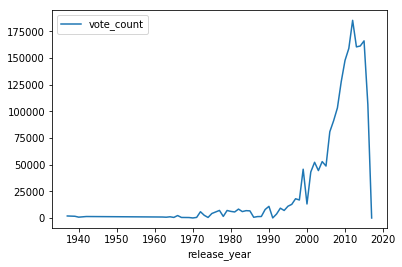

In [51]:
# График оцениваемости фильмов на ресурсе IMDB. Простой график для отображения динамики во времени.
df1.plot();

Text(0,0.5,'Frequency')

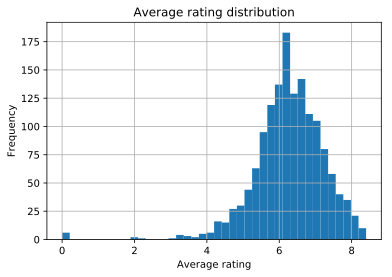

In [46]:
# Гистограмма распределения среднего балла по фильмам. Гистаграмма - лучшая визуализауия для непрерывных величин
# Пользователи обожают выражать свой гнев оценками 0 и 2 балла, но не 1 баллом.
ax = df.vote_average.hist(bins = 40) 
ax.set_title('Average rating distribution')
ax.set_xlabel('Average rating')
ax.set_ylabel('Frequency')

In [48]:
# Подготовка к работе с графиками в Seaborn
import seaborn as sns
%config InlineBackend.figure_format = 'png' 

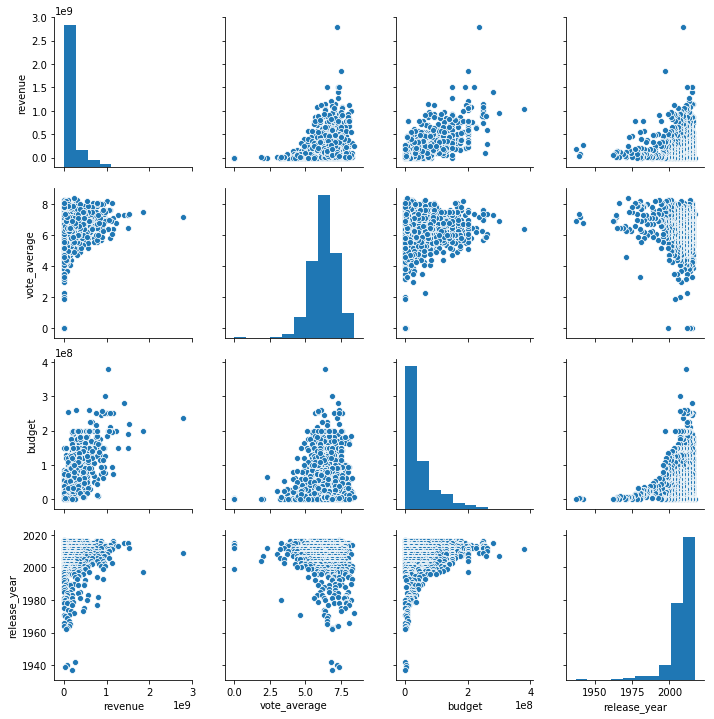

In [57]:
# Обзорная визуализация данных. Самое интересное:
#  1)Схожесть зависимостей средней оценки от бюджета и выручки. При чем выше бюджет, тем сложнее предсказать сборы.
#  2)Фильмы до 90-х годов выпуска оцениваются пользователями зачастую выше, чем современный фильмы.
sns_plot = sns.pairplot(
    df[['revenue', 'vote_average', 'budget', 'release_year']]);
sns_plot.savefig('pairplot.png')

In [58]:
%config InlineBackend.figure_format = 'svg' 

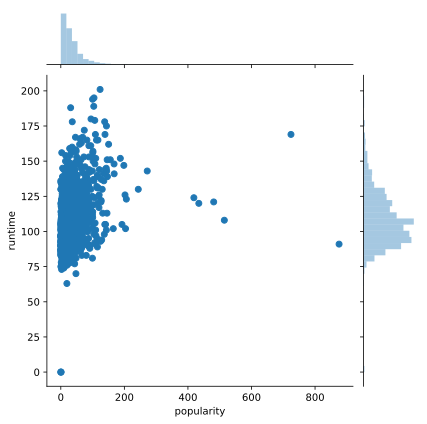

In [61]:
# Зависимость продолжительности фильма от его популярности.
sns.jointplot(x='popularity', y='runtime', 
              data=df, kind='scatter');

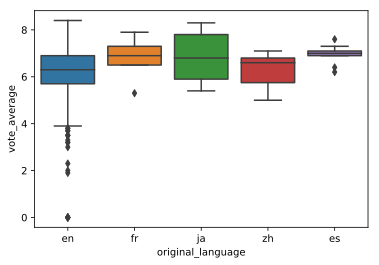

In [66]:
# Средние оценки по происхождению фильма
top_origin = df.original_language.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="original_language", y="vote_average", 
            data=df[df.original_language.isin(top_origin)]);

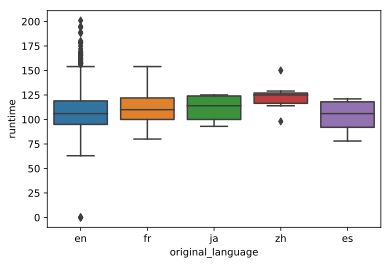

In [67]:
# Продолжительнсоть по происхождению фильма 

longest_by_origin = df.original_language.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="original_language", y="runtime", 
            data=df[df.original_language.isin(longest_by_origin)]);

In [74]:
! pip install plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [86]:
# Сравнение сборов и количества вышедших фильмов
global_sales_years_df = df.groupby('release_year')[['revenue']].sum()
released_years_df = df.groupby('release_year')[['title']].count()
years_df = global_sales_years_df.join(released_years_df)
years_df.columns = ['revenue', 'number_of_movies']

trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.revenue/100000000,
    name='revenue, 100*MUSD'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.number_of_movies,
    name='number of movies released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of movies'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)